<a href="https://colab.research.google.com/github/jiteshchandra80/heartdisease/blob/master/Heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

In [0]:
import numpy as np
import pandas as pd
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
print(df.shape)

(303, 14)


In [0]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

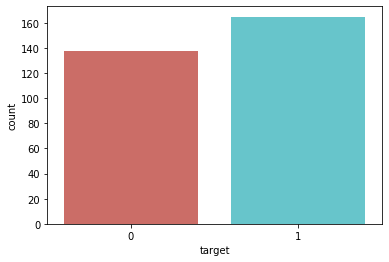

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="target",data=df,palette="hls")
plt.show()

In [0]:
X=pd.DataFrame(df.iloc[:,:-1])
y=pd.DataFrame(df.iloc[:,-1])

In [0]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [0]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [0]:
#Split the data into training and testing datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logR=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [0]:
logReg=logR.fit(x_train,y_train)
import warnings

warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
y_pred=logReg.predict(x_test)

In [0]:
#calculating the accuracy of the project
print("The accuracy of the model is : ",logReg.score(x_test,y_test))

The accuracy of the model is :  0.7704918032786885


In [0]:
from sklearn.metrics import confusion_matrix
conMat=confusion_matrix(y_test,y_pred)
print(conMat)

[[20 10]
 [ 4 27]]


In [0]:
(20+27)/(20+10+4+27)

0.7704918032786885